<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>

<p>
<center>
<font size="4">
Part 3, Chapter 2, Section 3: Convolutional Neural Networks
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Final project
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Yixi Liang
</font>
</center>
</p>
</b>

## Google drive

In [1]:
abspath_curr = 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project'

# Get the absolute path of the deep utilities folder
abspath_util_deep = 'C:/Users/REX/Desktop/teaching-master/gwu/machine_learning_I/spring_2022/code/utilities/p3_deep_learning'

## Warning

In [2]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [4]:
# %tensorflow_version 2.x 
import pandas as pd 
import os 
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Random seed

In [5]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

In [6]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

C:\Users\REX\Desktop\teaching-master\gwu\machine_learning_I\spring_2022\code\utilities\p3_deep_learning


## Loading the data

In this case study, we will work on the [Plant Seedlings Classification](https://www.kaggle.com/competitions/plant-seedlings-classification/overview).

### Creating the directory for the data

In [7]:
train_path = abspath_curr + '/train/'
test_path = abspath_curr 

In [8]:
for dirpath, dirnames, filenames in os.walk(abspath_curr): 
     print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 7 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project'.
There are 0 directories and 4 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\.ipynb_checkpoints'.
There are 2 directories and 0 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\result'.
There are 0 directories and 2 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\result\figure'.
There are 0 directories and 1 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\result\model'.
There are 0 directories and 794 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\test'.
There are 12 directories and 0 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\train'.
There are 0 directories and 263 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\train\Black-grass'.
There are 0 directories and 390 images in 'C:/Users/REX/Desktop/6202 Machine Learning/Final Project\train\Charloc

## Load data  

In [9]:
data_train = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=True,
                                                                 image_size=(224,224),
                                                                batch_size = 16, 
                                                                 seed=42,
                                                                validation_split=0.2,
                                                                   subset="training")

Found 4750 files belonging to 12 classes.
Using 3800 files for training.


In [10]:
data_valid = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=False,
                                                                 image_size=(224,224),
                                                                batch_size = 16,
                                                                 seed=42,
                                                                validation_split=0.2,
                                                                   subset="validation")

Found 4750 files belonging to 12 classes.
Using 950 files for validation.


In [11]:
datagen = ImageDataGenerator()
data_test = datagen.flow_from_directory(test_path ,shuffle =False,batch_size=100,
                              target_size = (224,224),classes = ['test'])

Found 794 images belonging to 1 classes.


In [12]:
class_names = data_train.class_names
n_classes = len(class_names)

# Training EfficientNetV2S

In [13]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model2/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Building the architecture of the model

In [14]:
# Add the pretrained layers
pretrained_model = keras.applications.EfficientNetV2S(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add the output layer
output = keras.layers.Dense(n_classes, activation='softmax')(average_pooling)

# Get the model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

model.summary()

82436096/82420632 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, None, None,   648         ['rescaling[0][0]']              
                             

 ization)                       192)                                                              
                                                                                                  
 block2c_expand_activation (Act  (None, None, None,   0          ['block2c_expand_bn[0][0]']      
 ivation)                       192)                                                              
                                                                                                  
 block2c_project_conv (Conv2D)  (None, None, None,   9216        ['block2c_expand_activation[0][0]
                                48)                              ']                               
                                                                                                  
 block2c_project_bn (BatchNorma  (None, None, None,   192        ['block2c_project_conv[0][0]']   
 lization)                      48)                                                               
          

 block3d_expand_conv (Conv2D)   (None, None, None,   147456      ['block3c_add[0][0]']            
                                256)                                                              
                                                                                                  
 block3d_expand_bn (BatchNormal  (None, None, None,   1024       ['block3d_expand_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 block3d_expand_activation (Act  (None, None, None,   0          ['block3d_expand_bn[0][0]']      
 ivation)                       256)                                                              
                                                                                                  
 block3d_project_conv (Conv2D)  (None, None, None,   16384       ['block3d_expand_activation[0][0]
          

                                                                                                  
 block4b_project_conv (Conv2D)  (None, None, None,   65536       ['block4b_se_excite[0][0]']      
                                128)                                                              
                                                                                                  
 block4b_project_bn (BatchNorma  (None, None, None,   512        ['block4b_project_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 block4b_add (Add)              (None, None, None,   0           ['block4b_project_bn[0][0]',     
                                128)                              'block4a_project_bn[0][0]']     
                                                                                                  
 block4c_e

 lization)                      128)                                                              
                                                                                                  
 block4d_add (Add)              (None, None, None,   0           ['block4d_project_bn[0][0]',     
                                128)                              'block4c_add[0][0]']            
                                                                                                  
 block4e_expand_conv (Conv2D)   (None, None, None,   65536       ['block4d_add[0][0]']            
                                512)                                                              
                                                                                                  
 block4e_expand_bn (BatchNormal  (None, None, None,   2048       ['block4e_expand_conv[0][0]']    
 ization)                       512)                                                              
          

 block5a_expand_conv (Conv2D)   (None, None, None,   98304       ['block4f_add[0][0]']            
                                768)                                                              
                                                                                                  
 block5a_expand_bn (BatchNormal  (None, None, None,   3072       ['block5a_expand_conv[0][0]']    
 ization)                       768)                                                              
                                                                                                  
 block5a_expand_activation (Act  (None, None, None,   0          ['block5a_expand_bn[0][0]']      
 ivation)                       768)                                                              
                                                                                                  
 block5a_dwconv2 (DepthwiseConv  (None, None, None,   6912       ['block5a_expand_activation[0][0]
 2D)      

                                                                                                  
 block5c_dwconv2 (DepthwiseConv  (None, None, None,   8640       ['block5c_expand_activation[0][0]
 2D)                            960)                             ']                               
                                                                                                  
 block5c_bn (BatchNormalization  (None, None, None,   3840       ['block5c_dwconv2[0][0]']        
 )                              960)                                                              
                                                                                                  
 block5c_activation (Activation  (None, None, None,   0          ['block5c_bn[0][0]']             
 )                              960)                                                              
                                                                                                  
 block5c_s

 )                              960)                                                              
                                                                                                  
 block5e_activation (Activation  (None, None, None,   0          ['block5e_bn[0][0]']             
 )                              960)                                                              
                                                                                                  
 block5e_se_squeeze (GlobalAver  (None, 960)         0           ['block5e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5e_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5e_se_squeeze[0][0]']     
                                                                                                  
 block5e_s

 block5g_se_squeeze (GlobalAver  (None, 960)         0           ['block5g_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5g_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5g_se_squeeze[0][0]']     
                                                                                                  
 block5g_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5g_se_reshape[0][0]']     
                                                                                                  
 block5g_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5g_se_reduce[0][0]']      
                                                                                                  
 block5g_se_excite (Multiply)   (None, None, None,   0           ['block5g_activation[0][0]',     
          

 block5i_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5i_se_reshape[0][0]']     
                                                                                                  
 block5i_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5i_se_reduce[0][0]']      
                                                                                                  
 block5i_se_excite (Multiply)   (None, None, None,   0           ['block5i_activation[0][0]',     
                                960)                              'block5i_se_expand[0][0]']      
                                                                                                  
 block5i_project_conv (Conv2D)  (None, None, None,   153600      ['block5i_se_excite[0][0]']      
                                160)                                                              
                                                                                                  
 block5i_p

                                256)                                                              
                                                                                                  
 block6b_project_bn (BatchNorma  (None, None, None,   1024       ['block6b_project_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 block6b_add (Add)              (None, None, None,   0           ['block6b_project_bn[0][0]',     
                                256)                              'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, None, None,   393216      ['block6b_add[0][0]']            
                                1536)                                                             
          

 block6d_add (Add)              (None, None, None,   0           ['block6d_project_bn[0][0]',     
                                256)                              'block6c_add[0][0]']            
                                                                                                  
 block6e_expand_conv (Conv2D)   (None, None, None,   393216      ['block6d_add[0][0]']            
                                1536)                                                             
                                                                                                  
 block6e_expand_bn (BatchNormal  (None, None, None,   6144       ['block6e_expand_conv[0][0]']    
 ization)                       1536)                                                             
                                                                                                  
 block6e_expand_activation (Act  (None, None, None,   0          ['block6e_expand_bn[0][0]']      
 ivation) 

                                                                                                  
 block6g_expand_bn (BatchNormal  (None, None, None,   6144       ['block6g_expand_conv[0][0]']    
 ization)                       1536)                                                             
                                                                                                  
 block6g_expand_activation (Act  (None, None, None,   0          ['block6g_expand_bn[0][0]']      
 ivation)                       1536)                                                             
                                                                                                  
 block6g_dwconv2 (DepthwiseConv  (None, None, None,   13824      ['block6g_expand_activation[0][0]
 2D)                            1536)                            ']                               
                                                                                                  
 block6g_b

 ivation)                       1536)                                                             
                                                                                                  
 block6i_dwconv2 (DepthwiseConv  (None, None, None,   13824      ['block6i_expand_activation[0][0]
 2D)                            1536)                            ']                               
                                                                                                  
 block6i_bn (BatchNormalization  (None, None, None,   6144       ['block6i_dwconv2[0][0]']        
 )                              1536)                                                             
                                                                                                  
 block6i_activation (Activation  (None, None, None,   0          ['block6i_bn[0][0]']             
 )                              1536)                                                             
          

 block6k_bn (BatchNormalization  (None, None, None,   6144       ['block6k_dwconv2[0][0]']        
 )                              1536)                                                             
                                                                                                  
 block6k_activation (Activation  (None, None, None,   0          ['block6k_bn[0][0]']             
 )                              1536)                                                             
                                                                                                  
 block6k_se_squeeze (GlobalAver  (None, 1536)        0           ['block6k_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6k_se_reshape (Reshape)   (None, 1, 1, 1536)   0           ['block6k_se_squeeze[0][0]']     
          

                                                                                                  
 block6m_se_squeeze (GlobalAver  (None, 1536)        0           ['block6m_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6m_se_reshape (Reshape)   (None, 1, 1, 1536)   0           ['block6m_se_squeeze[0][0]']     
                                                                                                  
 block6m_se_reduce (Conv2D)     (None, 1, 1, 64)     98368       ['block6m_se_reshape[0][0]']     
                                                                                                  
 block6m_se_expand (Conv2D)     (None, 1, 1, 1536)   99840       ['block6m_se_reduce[0][0]']      
                                                                                                  
 block6m_s

                                                                                                  
 block6o_se_reduce (Conv2D)     (None, 1, 1, 64)     98368       ['block6o_se_reshape[0][0]']     
                                                                                                  
 block6o_se_expand (Conv2D)     (None, 1, 1, 1536)   99840       ['block6o_se_reduce[0][0]']      
                                                                                                  
 block6o_se_excite (Multiply)   (None, None, None,   0           ['block6o_activation[0][0]',     
                                1536)                             'block6o_se_expand[0][0]']      
                                                                                                  
 block6o_project_conv (Conv2D)  (None, None, None,   393216      ['block6o_se_excite[0][0]']      
                                256)                                                              
          

In [15]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

In [16]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model2/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

In [17]:
# Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['accuracy']) 

In [18]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=5,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5
238/238 [==============================] - 50s 131ms/step - loss: 0.9255 - accuracy: 0.6961 - val_loss: 0.4756 - val_accuracy: 0.8442 - lr: 0.0100
Epoch 2/5
238/238 [==============================] - 26s 110ms/step - loss: 0.4225 - accuracy: 0.8603 - val_loss: 0.3105 - val_accuracy: 0.8968 - lr: 0.0100
Epoch 3/5
238/238 [==============================] - 26s 108ms/step - loss: 0.3116 - accuracy: 0.8950 - val_loss: 0.3398 - val_accuracy: 0.8747 - lr: 0.0100
Epoch 4/5
238/238 [==============================] - 28s 117ms/step - loss: 0.1749 - accuracy: 0.9458 - val_loss: 0.1376 - val_accuracy: 0.9600 - lr: 1.0000e-03
Epoch 5/5
238/238 [==============================] - 28s 116ms/step - loss: 0.1436 - accuracy: 0.9632 - val_loss: 0.1294 - val_accuracy: 0.9653 - lr: 1.0000e-03


In [19]:
#Evaluate on full data
model.evaluate(data_valid)

60/60 [==============================] - 5s 90ms/step - loss: 0.1294 - accuracy: 0.9653


[0.12942779064178467, 0.9652631282806396]

In [20]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

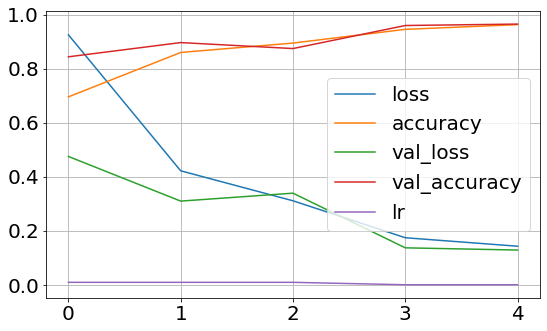

In [21]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing-model2.pdf')
plt.show()

## Unfreezing the pretrained layers

In [22]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                 label_mode="categorical", 
                                                                 shuffle=True,
                                                                 image_size=(224,224),
                                                                batch_size = 32)

Found 4750 files belonging to 12 classes.


In [23]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

## Compiling the model
Here we use a lower learning rate (by a factor of 10) of Adam optimizer, so that it is less likely to compromise the pretrained weights.

In [24]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [25]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=12,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/12
238/238 [==============================] - 103s 341ms/step - loss: 0.7657 - accuracy: 0.7895 - val_loss: 0.2040 - val_accuracy: 0.9484 - lr: 0.0010
Epoch 2/12
238/238 [==============================] - 74s 310ms/step - loss: 0.2373 - accuracy: 0.9184 - val_loss: 0.2291 - val_accuracy: 0.9337 - lr: 0.0010
Epoch 3/12
238/238 [==============================] - 74s 311ms/step - loss: 0.0928 - accuracy: 0.9682 - val_loss: 0.0211 - val_accuracy: 0.9926 - lr: 1.0000e-04
Epoch 4/12
238/238 [==============================] - 74s 311ms/step - loss: 0.0382 - accuracy: 0.9887 - val_loss: 0.0096 - val_accuracy: 0.9958 - lr: 1.0000e-04
Epoch 5/12
238/238 [==============================] - 75s 315ms/step - loss: 0.0227 - accuracy: 0.9939 - val_loss: 0.0087 - val_accuracy: 0.9968 - lr: 1.0000e-04
Epoch 6/12
238/238 [==============================] - 75s 316ms/step - loss: 0.0119 - accuracy: 0.9966 - val_loss: 0.0086 - val_accuracy: 0.9968 - lr: 1.0000e-04
Epoch 7/12
238/238 [===============

In [36]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=20,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/20
238/238 [==============================] - 75s 313ms/step - loss: 0.0080 - accuracy: 0.9984 - val_loss: 0.0073 - val_accuracy: 0.9979 - lr: 1.0000e-08
Epoch 2/20
238/238 [==============================] - 75s 313ms/step - loss: 0.0095 - accuracy: 0.9979 - val_loss: 0.0068 - val_accuracy: 0.9979 - lr: 1.0000e-08
Epoch 3/20
238/238 [==============================] - 74s 310ms/step - loss: 0.0069 - accuracy: 0.9987 - val_loss: 0.0070 - val_accuracy: 0.9979 - lr: 1.0000e-08
Epoch 4/20
238/238 [==============================] - 74s 312ms/step - loss: 0.0078 - accuracy: 0.9984 - val_loss: 0.0094 - val_accuracy: 0.9968 - lr: 1.0000e-09


## Plotting the learning curve

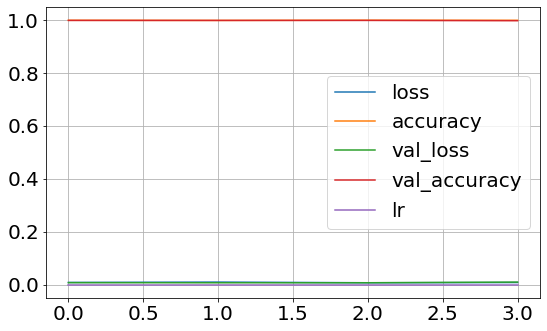

In [37]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing_model2.pdf')
plt.show()

# Testing

## Loading the saved model

In [38]:
# Load the saved model
model.load_weights(filepath=abspath_curr + '/result/model2/model.h5')

In [39]:
#Prepare the Test data using Tensorflow Image Generator

datagen = ImageDataGenerator()
gen = datagen.flow_from_directory(test_path ,shuffle =False,batch_size=100,
                              target_size = (224,224),classes = ['test'])

Found 794 images belonging to 1 classes.


In [40]:
prediction = model.predict(gen)
prediction.shape

(794, 12)

In [41]:
class_names[tf.argmax(prediction[2])]

'Sugar beet'

In [42]:
#Read sample submission file 
sample_submission = pd.read_csv(abspath_curr + '/sample_submission.csv')
sample_submission.head()

,file,species
0,0021e90e4.png,Sugar beet
1,003d61042.png,Sugar beet
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Sugar beet
4,00c47e980.png,Sugar beet


In [43]:
len(sample_submission)

794

In [44]:
#Prepare prediction results
predict_class = []
for pred in prediction: 
    predict_class.append(class_names[tf.argmax(pred)])

predict_class[:10]

['Small-flowered Cranesbill',
 'Fat Hen',
 'Sugar beet',
 'Common Chickweed',
 'Sugar beet',
 'Black-grass',
 'Common Chickweed',
 'Fat Hen',
 'Loose Silky-bent',
 'Loose Silky-bent']

In [45]:
submission = pd.DataFrame({'file':sample_submission['file'],'species':predict_class})
submission.head()

,file,species
0,0021e90e4.png,Small-flowered Cranesbill
1,003d61042.png,Fat Hen
2,007b3da8b.png,Sugar beet
3,0086a6340.png,Common Chickweed
4,00c47e980.png,Sugar beet


In [47]:
submission.to_csv(abspath_curr + '/submission2.csv', index=False)